# **Projeto Pipeline de Dados do Telegram**
**por [Layssa Santos](https://www.linkedin.com/in/layssa-santos/)**

![projeto](https://raw.githubusercontent.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/a30172f0845ebe586018bc4990305927977db073/Imagens/Projeto.drawio.svg)

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1R_LhA6ivl4D_S6U40gXeKqZpOtRLQJ65?usp=sharing)

---
## **Tópicos**
#### 1. [**Contexto**](#contexto)  
    1.1 Chatbot  
#### 2. [**Arquitetura**](#arqui)  
#### 3. [**Sistema Transacional**](#trans)
    3.1 Telegram
    3.3 Dados Transacionais
#### 4. [**Sistema Analítico**](#analitico)    
    4.1 Ingestão
    4.2 ETL
    4.3 Apresentação


<a id='contexto'></a>
## 1\. **Contexto**

Este projeto consiste em relacionar o mundo de chatbots em aplicativos como o Telegram com a computação em nuvem da Amazon Web Services (AWS). O pipeline de dados se inicia com a captura dos dados fornecidos pelo bot do Telegram via API WEB, pelo AWS API Gateway. Adiante, na plataforma da AWS, são realizadas as três etapas: ingestão, ETL e apresentação dos dados, utilizando-se ferramentas como AWS Lambda, AWS S3, AWS Event Bridge e AWS Athena durante o processo.

### **1.1. Chatbot**

Um **chatbot** é um tipo de software que interage com usuários através de conversas automatizadas em plataformas de mensagens. Ele está cada vez mais presente em aplicativos e sites e é capaz de compreender e interpretar a intenção do usuário por meio de texto ou voz, fornecendo respostas relevantes e precisas em tempo real.

Uma aplicação comum de **chatbots** é o seu uso no atendimento ao cliente, onde, de maneira geral, ajudam clientes a resolver problemas ou esclarecer dúvidas recorrentes antes mesmo que um atendente humano seja acionado.

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/chatbot.jpg?raw=true)

Nesse sentido, chatbots podem funcionar como uma boa fonte de `dados transacionais`, pois também são capazes de fornecer informações específicas e detalhadas que registram atividades individuais ou transações dentro de um sistema ou organização.

Assim, torna-se útil armazenar mensagens desses chats em base de dados para serem analisadas, sendo possível saber, por exemplo, quais mensagens ou dúvidas são mais frequentes, quais respostas são mais esperadas, qual a média de tamanho das mensagens, quais usuários costumam mandar mais mensagens, em quais grupos, e assim por diante.

Em geral, as mensagens captadas pelo chatbot são fornecidas por API's para uso externo, e apresentam formatos de dados semi-estruturados, como JSON. Deste modo, para a tranformação em `dados analíticos`, muitas vezes é necessário realizar um data wrangling dos dados transicionais para que se tornem analisáveis por profissionais de dados. Isto pode ser feito por uma arquitetura em nuvem, como na AWS (Amazon Web Services), que também nos permite realizar consultas SQL ao fim do processo. É o que veremos ao longo deste projeto.

---

<a id='arqui'></a>
## **2\. Arquitetura**

Conforme exemplifica o diagrama a seguir, a arquitetura deste projeto é divido em dois sistemas: o **sistema transacional**, onde os dados são produzidos, e o **sistema analítico**, na Amazon Web Services (AWS), onde os dados são analisados.

![arquitetura](https://raw.githubusercontent.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/76120fea0d0cb0764eeaa3ae632bb24d4dbd6591/Imagens/arquitetura-pipeline.drawio.svg)

 - **Telegram**

O `Telegram` representa a fonte de dados transacionais. Mensagens enviadas por usuários em um grupo são capturadas por um *bot* e redirecionadas via *webhook* do *backend* do aplicativo para um *endpoint* (endereço *web* que aceita requisições HTTP) exposto pelo `AWS API Gateway`. As mensagens trafegam no corpo ou *payload* da requisição.

 - **AWS | Ingestão**

Uma requisição HTTP com o conteúdo da mensagem em seu *payload* é recebida pelo `AWS API Gateway` que, por sua vez, as redireciona para o `AWS Lambda`, servindo assim como seu gatilho. Já o `AWS Lambda` recebe o *payload* da requisição em seu parâmetro *event*, salva o conteúdo em um arquivo no formato JSON (original, mesmo que o *payload*) e o armazena no `AWS S3` particionado por dia.

 - **AWS | ETL**

Uma vez ao dia, o `AWS Event Bridge` aciona o `AWS Lambda` que processa todas as mensagens do dia anterior (atraso de um dia ou D-1), denormaliza o dado semi-estruturado típico de arquivos no formato JSON, salva o conteúdo processado em um arquivo no formato Apache Parquet e o armazena no `AWS S3` particionado por dia.

 - **AWS | Apresentação**

Por fim, uma tabela do `AWS Athena` é apontada para o *bucket* do `AWS S3` que armazena o dado processado: denormalizado, particionado e orientado a coluna. Profissionais de dados podem então executar consultas analíticas (agregações, ordenações, etc.) na tabela utilizando o SQL para a extração de *insights*.

---

<a id='trans'></a>
### **3. Sistema Transacional**

Um sistema transacional é uma estrutura tecnológica e de dados que suporta as transações diárias de uma fonte de dados. Ele é responsável por coletar, registrar e transmitir dados para uma cadeia de processos que tratarão os dados para posterior análise. Em resumo, os sistemas transacionais são projetados para ingerir dados criados diariamente e salvá-los em um banco de dados ou DataLake. [Fonte](https://insightsoftware.com/encyclopedia/transactional-systems/)

#### **3.1. Telegram**

O Telegram representa a fonte de dados transacionais. Mensagens enviadas por usuários em um grupo são capturadas por um bot e redirecionadas via webhook do backend do aplicativo para um endpoint (endereço web que aceita requisições HTTP) exposto pelo AWS API Gateway. As mensagens trafegam no corpo ou payload da requisição.

> **Criação do bot**:
Na plataforma web do Telegram foi criado um bot a partir do Botfather e dado o nome de
m42_project_layssa_bot

![criarbot](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/create_bot.png?raw=true)

>Após a criação do bot, criei um grupo ao qual tenho interesse em captar as interações entre os integrantes.

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/group_telegram.png?raw=true)

>O bot criado foi adicionado ao grupo e encarregado a  administrador, permitindo assim que ele capte a conversa de todos os integrantes do grupo.

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/group_bot_adm.png?raw=true)

As mensagens captadas pelo bot podem ser acessadas via API.

> 💡 API é a sigla para "Application Programming Interface", que em português significa "Interface de Programação de Aplicações", ela atua como uma interface intermediária que permite a comunicação e a interação entre diferentes sistemas, aplicativos ou plataformas, facilitando o compartilhamento de informações e funcionalidades de maneira eficiente e padronizada.



#### 3.2. **Dados Transacionais**

Para explorarmos os dados transacionais fornecidos pelo API de Bot do Telegram, utilizaremos o token de acesso fornecido pelo BotFather na criação do bot e com o auxílio do pacote nativo do Python getpass vamos garantir a privacidade da informação.

In [1]:
from getpass import getpass

token = getpass()

StdinNotImplementedError: getpass was called, but this frontend does not support input requests.

A `url` base é comum a todos os métodos da API.

In [ ]:
import json

base_url = f'https://api.telegram.org/bot{token}'

- **getMe**

O método `getMe` retorna informações sobre o *bot*.

In [ ]:
import requests

response = requests.get(url=f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

 - **getUpdates**

O método `getMe` retorna as mensagens captadas pelo *bot*.

In [ ]:
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

 - **Descrição:**

| chave | tipo valor | opcional | descrição |
| -- | -- | -- | -- |
| updated_id | int | não | id da mensagem enviada ao **bot** |
| message_id | int | não | id da mensagem enviada ao grupo |
| from_id | int | sim | id do usuário que enviou a mensagem |
| from_is_bot | bool | sim | se o usuário que enviou a mensagem é um **bot** |
| from_first_name | str | sim | primeiro nome do usário que enviou a mensagem |
| chat_id | int | não | id do *chat* em que a mensagem foi enviada |
| chat_type | str | não | tipo do *chat*: private, group, supergroup ou channel |
| date | int | não | data de envio da mensagem no formato unix |
| text | str | sim | texto da mensagem |

Uma mensagem recuperada via API é um dado semi-estruturado no formato JSON com algumas chaves mandatórias e diversas chaves opcionais, estas últimas presentes (ou não) dependendo do tipo da mensagem. Por exemplo, mensagens de texto apresentam a chave `text` enquanto mensagens de áudio apresentam a chave `audio`. Neste projeto vamos focar em mensagens do tipo texto, ou seja, vamos ingerir as chaves mandatórias e a chave `text`.

___

<a id='analitico'></a>
### **4. Sistema Analítico**

Esses sistemas apoiam a tomada de decisões, relatórios, consultas e análises. São projetados para lidar com consultas complexas em grandes volumes de dados vindos dos sistemas transacionais, organizam esses dados e os processam de maneira a criar insights úteis. Neste projeto o sistema compreende a retirada dos dados brutos (raw) do datalake, a transformação deles em informação e a análise em busca de padrões e insights. [Fonte](http://bi-insider.com/posts/types-of-enterprise-data-transactional-analytical-master/)

Neste projeto, o sistema analítico irá compreender a Ingestão, ETL e Apresentação dos dados fornecidos via API *Web* de bots do Telegram, tudo isso na Amazon Web Services.

#### **4.1\. Ingestão**

A etapa de **ingestão** é responsável, como seu o próprio nome diz, pela ingestão dos dados transacionais em ambientes analíticos. De maneira geral, o dado ingerido é persistido no formato mais próximo do original, ou seja, nenhuma transformação é realizada em seu conteúdo ou estrutura (*schema*).

Sendo assim, precisamos de um serviço da AWS que forneça um API *web* para receber os dados redirecionados, o `AWS API Gateway` (documentação neste [link](https://docs.aws.amazon.com/pt_br/apigateway/latest/developerguide/welcome.html)). Dentre suas diversas funcionalidades, o `AWS API Gateway` permite o redirecionamento do dado recebido para outros serviços da AWS. Logo, vamos conecta-lo ao `AWS Lambda`, que pode sua vez, irá armazenar o dado em seu formato original (JSON) em um *bucket* do `AWS S3`.

- **AWS API GATEWAY**

> [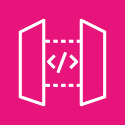](https://aws.amazon.com/pt/api-gateway/)

Na etapa de **ingestão**, o `AWS API Gateway` tem a função de receber as mensagens captadas pelo *bot* do **Telegram**, enviadas via *webhook*, e iniciar uma função do `AWS Lambda`, passando o conteúdo da mensagem no seu parâmetro *event*. Para tanto vamos criar uma API e configurá-la como gatilho da função do `AWS Lambda`:

>Criação da API com protocolo REST e método POST, configurado com integração do tipo proxy com o serviço Lambda.

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/aws_api_create.png?raw=true)

Por fim, vamos fazer a implantação da API e obter o seu endereço *web*.

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/aws_api_url.png?raw=true)

- **WEBHOOK**

A Ingestão pode ser conduzida de duas formas:

 - **Batch**: blocos de dados são ingeridos em uma frequência bem definida, geralmente na escala de horas ou dias;
 - **Streaming**: dados são ingeridos conforme são produzidos e disponibilizados.

Como o **Telegram** retem mensagens por apenas 24h em seus servidores, a ingestão via **streaming** é a mais indicada para este projeto. Para que seja possível esse tipo de **ingestão** seja possível, vamos utilizar um *webhook* (gancho *web*), ou seja, vamos redirecionar as mensagens automaticamente para o AWS API Gateway.

In [ ]:
#adicionando o endereço WEB fornecido pelo AWS API Gateway em uma variável

aws_api_gateway_url = getpass()

O método `setWebhook` configura o redirecionamento das mensagens captadas pelo *bot* para o endereço *web* do paramametro `url`.

In [ ]:
response = requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')

print(json.dumps(json.loads(response.text), indent=2))

Utilizando o método `getWebhookInfo` para obter as informações sobre o *webhook* configurado.

In [ ]:
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

- **AWS S3**

> [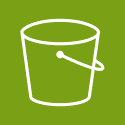](https://aws.amazon.com/pt/s3/)

Na etapa de **ingestão**, o `AWS S3` tem a função de passivamente armazenar as mensagens captadas pelo *bot* do **Telegram** no seu formato original: JSON. Para tanto, foi criado o *bucket* "projeto-m42-pipeline-raw", que será vinculado a uma função Lambda na etapa a seguir.

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/aws_s3_ingestao.png?raw=true)

- **AWS Lambda**

> [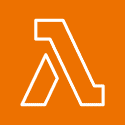](https://aws.amazon.com/pt/lambda/)

Durante a **ingestão**, o `AWS Lambda` irá persistir ativamente as mensagens captadas pelo *bot* do **Telegram** no *bucket* que criamos no `AWS S3` ("projeto-m42-pipeline-raw"). Para tanto, será utlizada uma função que opera da seguinte forma:

In [ ]:
import os
import json
import logging
from datetime import datetime, timezone

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagem do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")

Como estamos trabalhando com informações potencialmente sensíveis, o código foi pensado para exigir a configuração de duas variáveis de ambiente: `AWS_S3_BUCKET` com o nome do *bucket* do `AWS S3` e `TELEGRAM_CHAT_ID` com o id do *chat* do grupo do **Telegram**. Além disso, foi adicionada a permissão de escrita no *bucket* do `AWS S3` para a função do `AWS Lambda` no `AWS IAM`.

#### **4.2\. ETL**

A etapa de **extração, transformação e carregamento** (do inglês *extraction, transformation and load* ou **ETL**) é uma etapa abrangente responsável pela manipulação dos dados ingeridos de sistemas transacionais, ou seja, já persistidos em camadas cruas ou *raw* de sistemas analíticos. Em geral, o dado cru ingerido passa por um processo recorrente de *data wrangling* onde o dado é limpo, deduplicado, etc. e persistido com técnicas de particionamento, orientação a coluna e compressão. Por fim, o dado processado está pronto para ser analisado por profissionais de dados.

Neste projeto, as mensagens de um único dia, persistidas na camada cru, serão compactas em um único arquivo, orientado a coluna e comprimido, que será persistido em uma camada enriquecida. Além disso, durante este processo, o dado também passará por etapas de *data wrangling*.

Para isso, vamos utilizar uma função do `AWS Lambda` como motor de processamento e um *bucket* do `AWS S3` como camada enriquecida para a persistência do dado processado. Para garantir a recorrência, vamos configurar uma regra do `AWS Event Bridge` como gatilho diáro da função.

- **AWS S3**

> [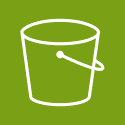](https://aws.amazon.com/pt/s3/)

Na etapa de **ETL**, o `AWS S3` tem a função de passivamente armazenar as mensagens processadas de um dia em um único arquivo no formato Parquet. Para tanto, foi criado o *bucket* "projeto-m42-pipeline-enriched", que será vinculado à uma função na etapa a seguir.

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/aws_s3_ETL.png?raw=true)

- **AWS Lambda**

> [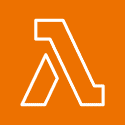](https://aws.amazon.com/pt/lambda/)

A função do `AWS Lambda`, no momento de ETL, é de ativamente processar as mensagens captadas pelo *bot* do **Telegram**, persistidas na camada cru no *bucket* do `AWS S3` (criado na etapa de ingestão), e persisti-las na camada enriquecida, também em um *bucket* do `AWS S3`(o qual acabamos de criar na etapa de ETL). Logo, será utilizada uma função que opera da seguinte forma:

O código da função:

In [ ]:
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False

# código da função de Data Wrangling

def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data

Aqui também fizemos algumas configurações no AWS Lambda. Já que o código exige a configuração de duas variáveis de ambiente: AWS_S3_BUCKET e AWS_S3_ENRICHED com os nomes dos bucket do AWS S3 da camada cru e enriquecida, respectivamente. Além disso, foi adicionada a permissão de escrita nos buckets do AWS S3 para a função do AWS Lambda no AWS IAM.

- **AWS Event Bridge**

> [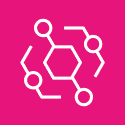](https://aws.amazon.com/pt/eventbridge/)

Na etapa de **ETL**, o `AWS Event Bridge` tem a função de ativar diariamente a função de **ETL** do `AWS Lambda`, funcionando assim como um *scheduler*, ou seja, ele é responsável por inicializar o processo de transformação, uma vez ao dia às 00:00h.

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/aws_eventbridge_rule.png?raw=true)

#### 4.3. **Apresentação**

A etapa de **apresentação** é reponsável por entregar o dado para os usuários (analistas, cientistas, etc.) e sistemas (dashboards, motores de consultas, etc.), idealmente através de uma interface de fácil uso, como o SQL, logo, essa é a única etapa que a maioria dos usuários terá acesso.

- **AWS Athena**

> [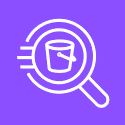](https://aws.amazon.com/pt/athena/)

Neste momento, o `AWS Athena` tem a função de entregar o dados através de uma interface SQL para os usuários do sistema analítico. Para criar a interface, foi criada uma tabela externa sobre o dado armazenado na camada mais refinada da arquitetura, a camada enriquecida.

>**Query**:
```sql
CREATE EXTERNAL TABLE `telegram`(
  `message_id` bigint,
  `user_id` bigint,
  `user_is_bot` boolean,
  `user_first_name` string,
  `chat_id` bigint,
  `chat_type` string,
  `text` string,
  `date` bigint)
PARTITIONED BY (
  `context_date` date)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://<bucket-enriquecido>/'
```

**Por fim, foram adicionadas as partições**
>**Query**:
```sql
MSCK REPAIR TABLE `telegram`;
```

**Consultando as 10 primeiras linhas para observar o resultado**

>**Query**:
```sql
SELECT * FROM `telegram` LIMIT 10;
```

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/table_10.JPG?raw=true)

- **Analytics**

Com o dado disponível, podemos executar as mais variadas consultas analíticas. Seguem alguns exemplos:

**Quantidade de mensagens por dia**

>**Query**:
```sql
SELECT
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY context_date
ORDER BY context_date DESC
```

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/amount_day.JPG?raw=true)

**Quantidade de mensagens por usuário por dia**

>**Query**:
```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/amount_user_day.JPG?raw=true)

**Média do tamanho das mensagens por usuário por dia**
>**Query**:
```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  CAST(AVG(length(text)) AS INT) AS "average_message_length"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/average_msg.JPG?raw=true)

**Quantidade de mensagens por hora por dia da semana por número da semana**
>**Query**:
```sql
WITH
parsed_date_cte AS (
    SELECT
        *,
        CAST(date_format(from_unixtime("date"),'%Y-%m-%d %H:%i:%s') AS timestamp) AS parsed_date
    FROM "telegram"
),
hour_week_cte AS (
    SELECT
        *,
        EXTRACT(hour FROM parsed_date) AS parsed_date_hour,
        EXTRACT(dow FROM parsed_date) AS parsed_date_weekday,
        EXTRACT(week FROM parsed_date) AS parsed_date_weeknum
    FROM parsed_date_cte
)
SELECT
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum,
    count(1) AS "message_amount"
FROM hour_week_cte
GROUP BY
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum
ORDER BY
    parsed_date_weeknum,
    parsed_date_weekday
```

![](https://github.com/layssasantos/Projeto-Pipeline-de-Dados-do-Telegram/blob/main/Imagens/hour_day_week.JPG?raw=true)